In [59]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier

In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Wine_Quality_Data.csv", sep=',')

In [4]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [8]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [12]:
y = (data['color']=='red').astype(int)

In [15]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: color, Length: 6497, dtype: int32

In [16]:
X = list(data.columns[:-1])

In [17]:
correlation = data[X].corrwith(y)
correlation.sort_values(inplace=True)
correlation

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

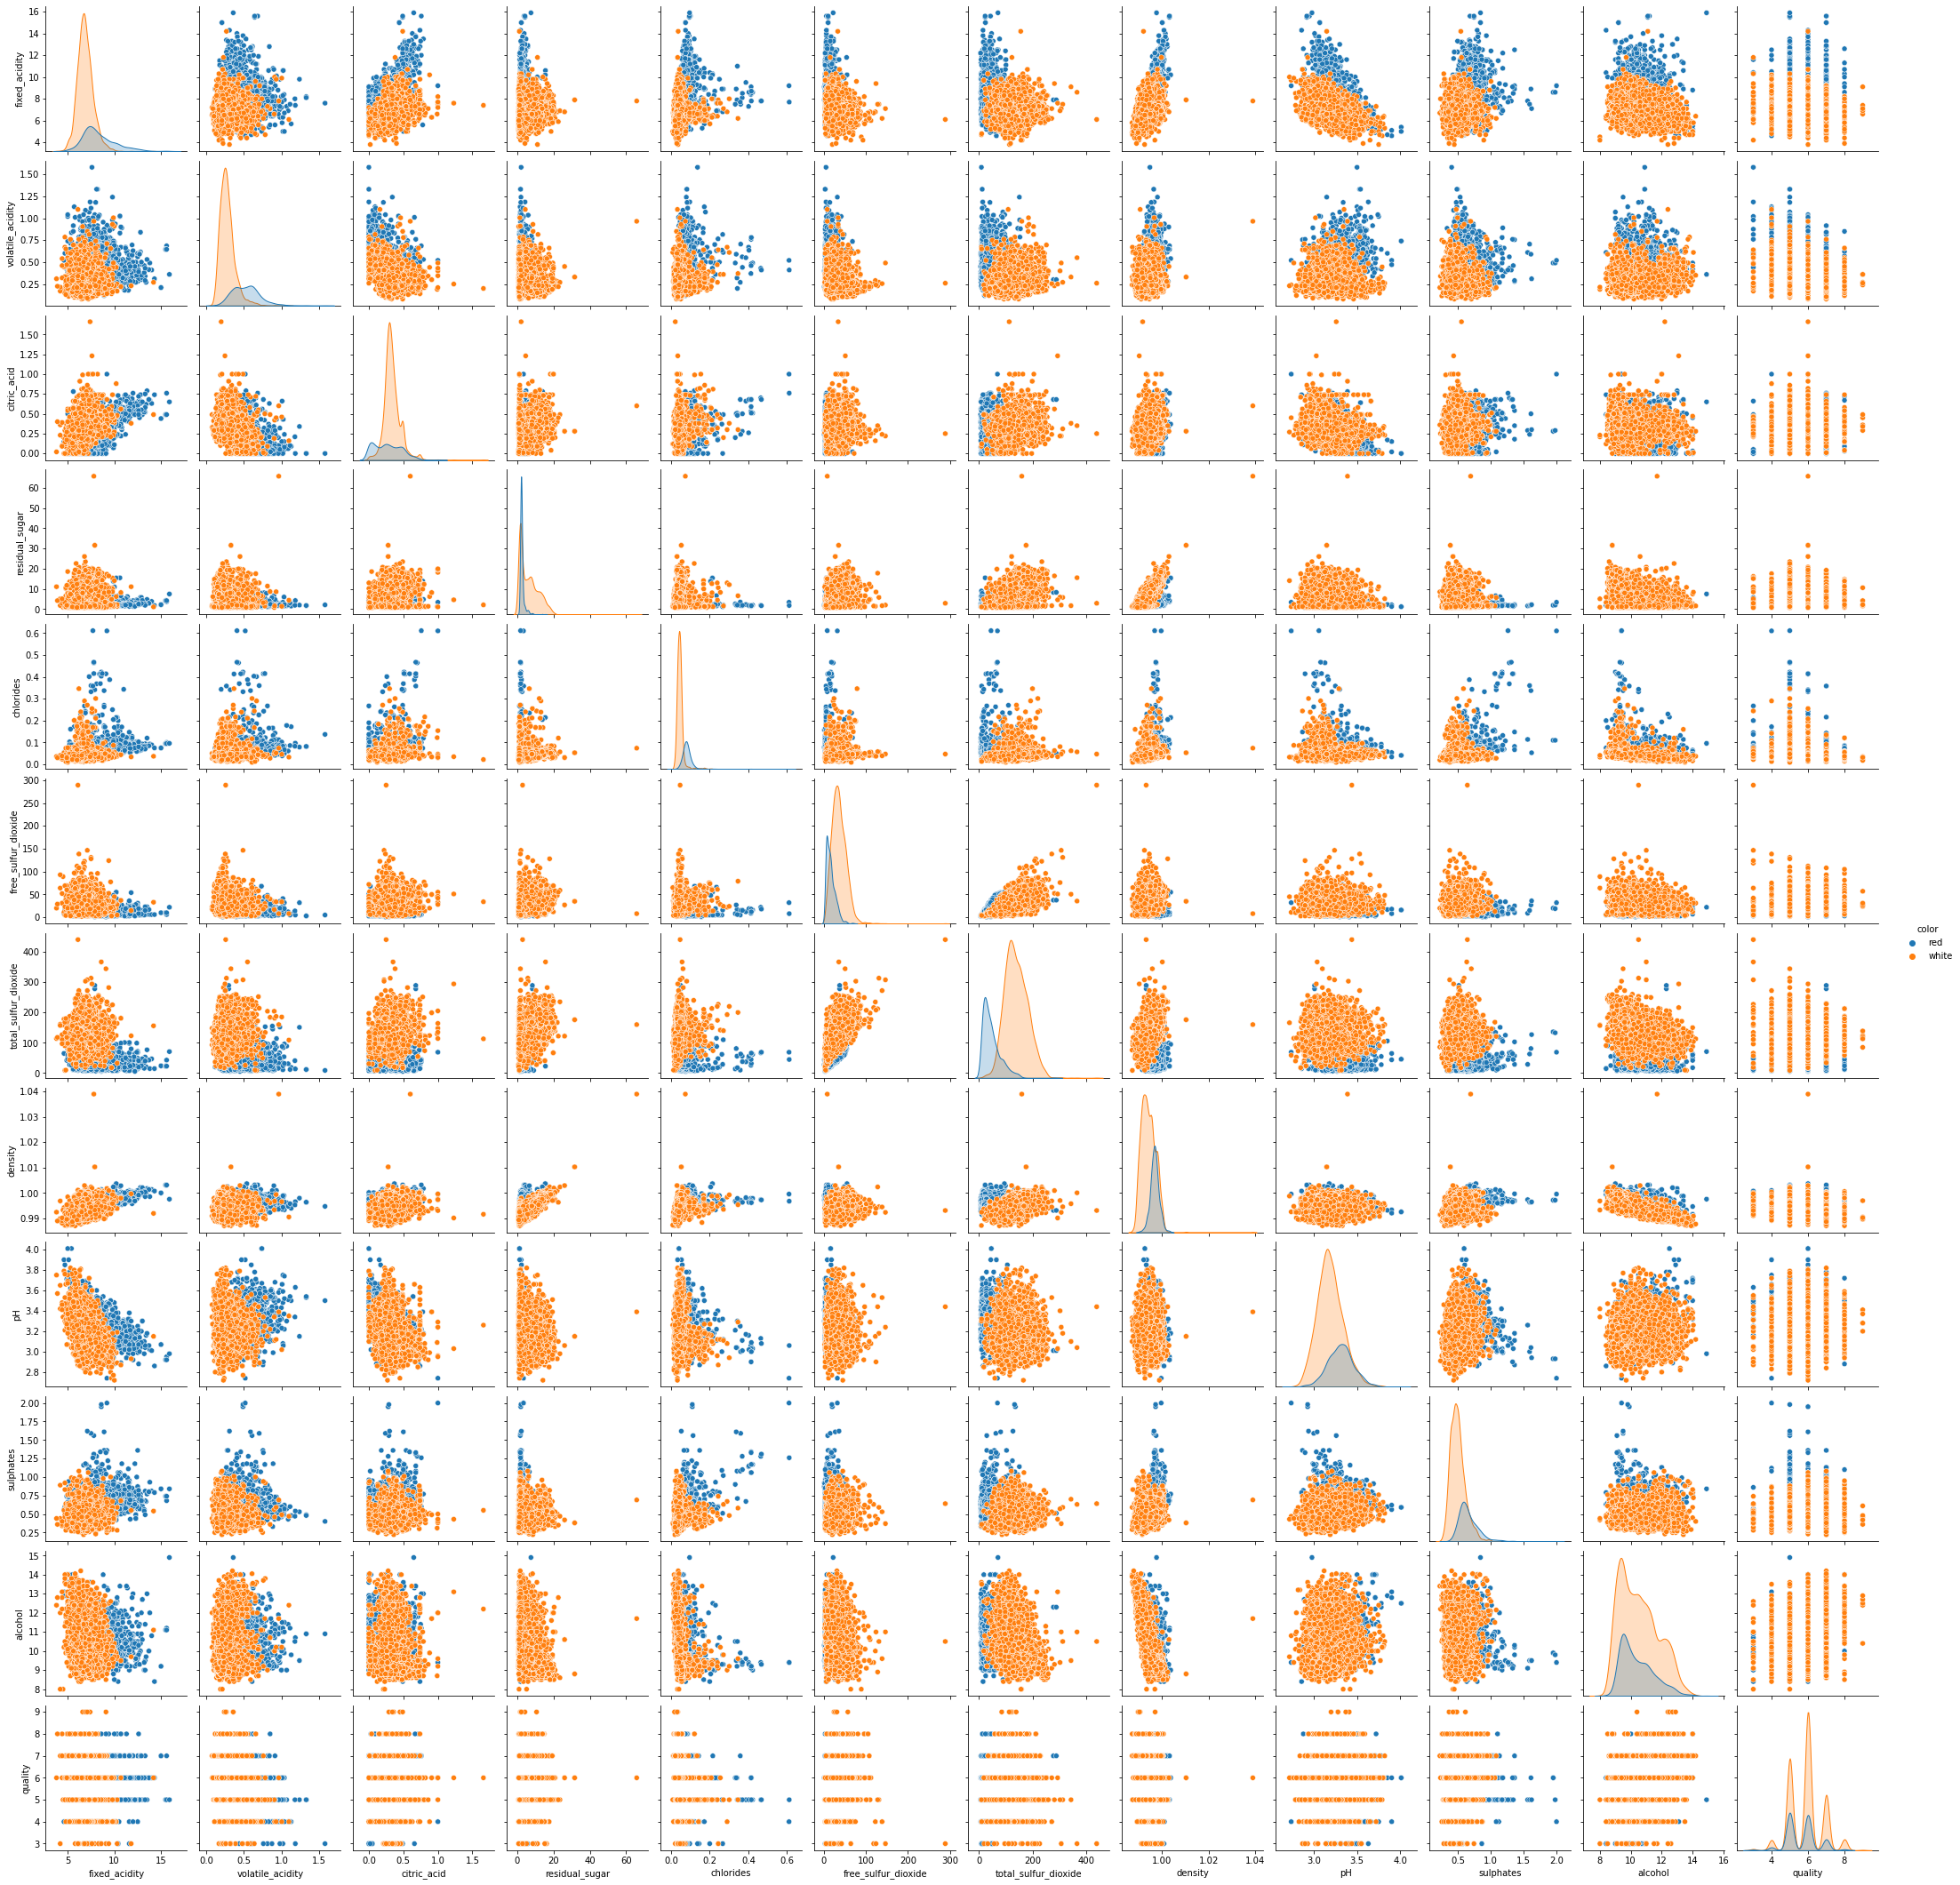

In [19]:
sns.pairplot(data, hue='color')

[(-1.0, 1.0)]

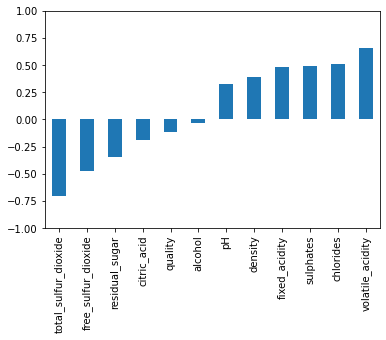

In [22]:
ax = correlation.plot(kind='bar')
ax.set(ylim=[-1,1])

In [24]:
correlation.map(abs).sort_values().iloc[-2:]

volatile_acidity        0.653036
total_sulfur_dioxide    0.700357
dtype: float64

###### Selecting the highly correlated features

In [41]:
Xx=correlation.map(abs).sort_values().iloc[-2:].index

In [42]:
data[Xx].describe()

,volatile_acidity,total_sulfur_dioxide
count,6497.000000,6497.000000
mean,0.339666,115.744574
std,0.164636,56.521855
min,0.080000,6.000000
25%,0.230000,77.000000
50%,0.290000,118.000000
75%,0.400000,156.000000
max,1.580000,440.000000


In [43]:
X=data[Xx]

In [44]:
mms = MinMaxScaler()
X=mms.fit_transform(X)

In [45]:
X

array([[0.41333333, 0.06451613],
       [0.53333333, 0.140553  ],
       [0.45333333, 0.11059908],
       ...,
       [0.10666667, 0.24193548],
       [0.14      , 0.23963134],
       [0.08666667, 0.21198157]])

In [46]:
X = pd.DataFrame(X, columns=['scaled_%s' %x for x in Xx])

In [47]:
X.describe()

,scaled_volatile_acidity,scaled_total_sulfur_dioxide
count,6497.000000,6497.000000
mean,0.173111,0.252868
std,0.109758,0.130235
min,0.000000,0.000000
25%,0.100000,0.163594
50%,0.140000,0.258065
75%,0.213333,0.345622
max,1.000000,1.000000


##### Linear Decision Boundary

In [48]:
LSVC = LinearSVC()
LSVC.fit(X, y)


LinearSVC()

In [49]:
X.count()

scaled_volatile_acidity        6497
scaled_total_sulfur_dioxide    6497
dtype: int64

In [52]:
X_color = X.sample(300, random_state=50)
X_color.index

Int64Index([3419,  834, 5340, 6363, 3916, 2164, 1233, 2334, 4862, 3989,
            ...
            6381, 6479, 4765, 5877, 1246, 4498,  139,  349, 1906, 5694],
           dtype='int64', length=300)

In [57]:
y_color=y.loc[X_color.index]
y_color = y_color.map(lambda r:'red' if r==1 else 'yellow')

C:\Users\sundh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


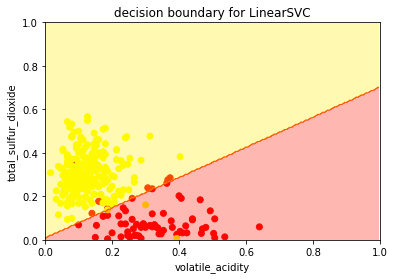

In [76]:
ax = plt.axes()
ax.scatter(X_color.iloc[:,0], X_color.iloc[:,1], color=y_color, alpha=1)
x_axis, y_axis = np.arange(0,1,0.005), np.arange(0,1,0.005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel=xx.ravel()
yy_ravel=yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)

ax.set(xlabel=Xx[0], ylabel=Xx[1], xlim=[0, 1], ylim=[0, 1], title='decision boundary for LinearSVC');

In [77]:
def decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=Xx[0],
        ylabel=Xx[1],
        title=str(estimator))

C:\Users\sundh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\sundh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\sundh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\sundh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


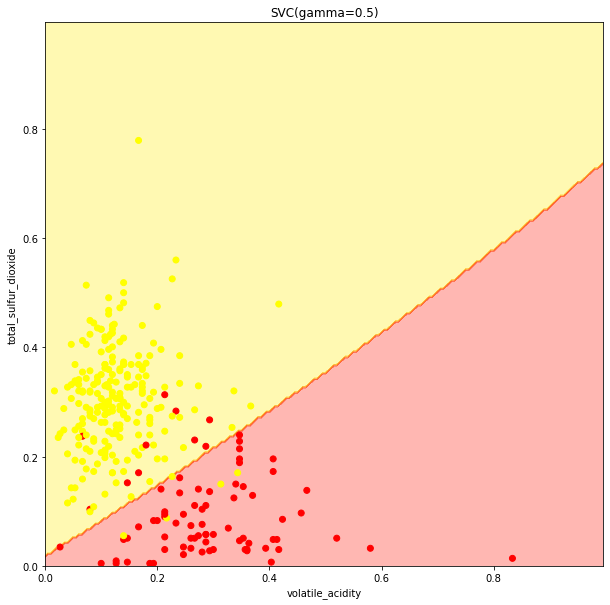

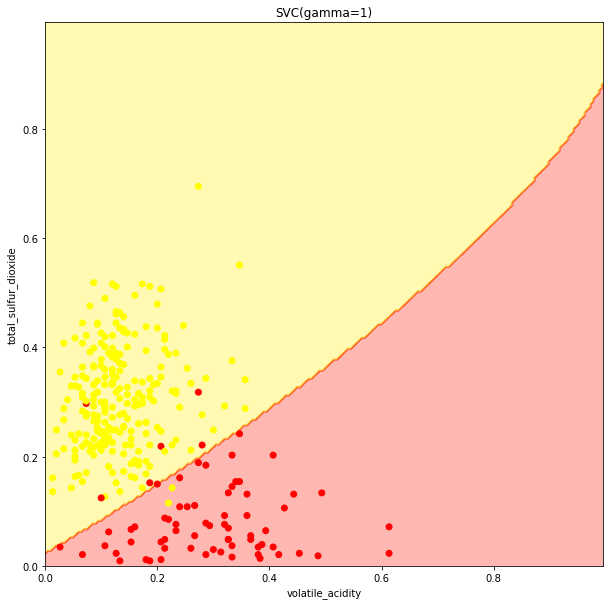

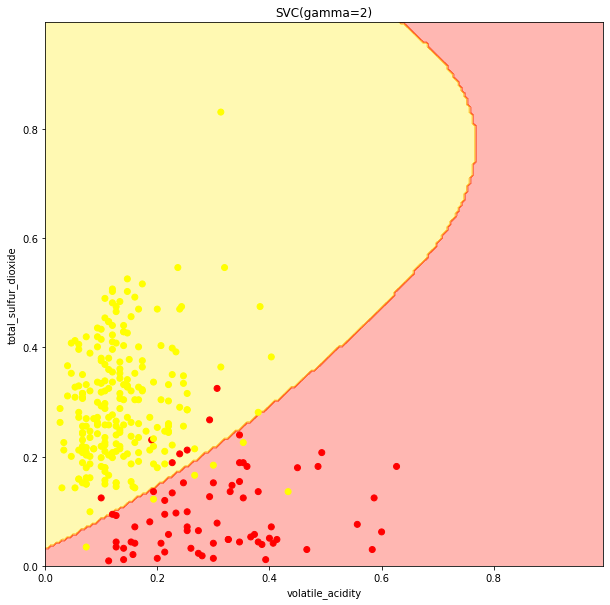

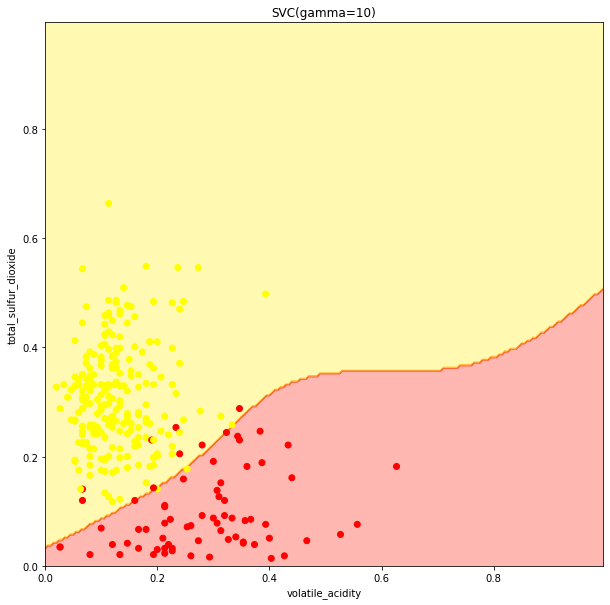

In [78]:
gammas = [.5, 1, 2, 10]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    decision_boundary(SVC_Gaussian, X, y)

C:\Users\sundh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\sundh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\sundh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


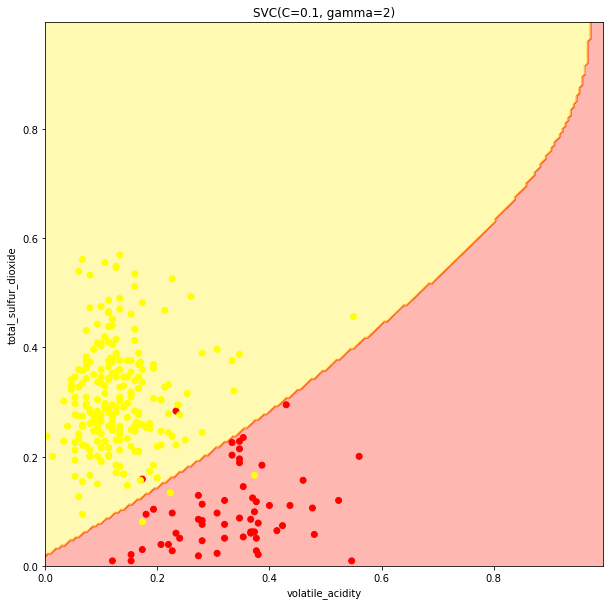

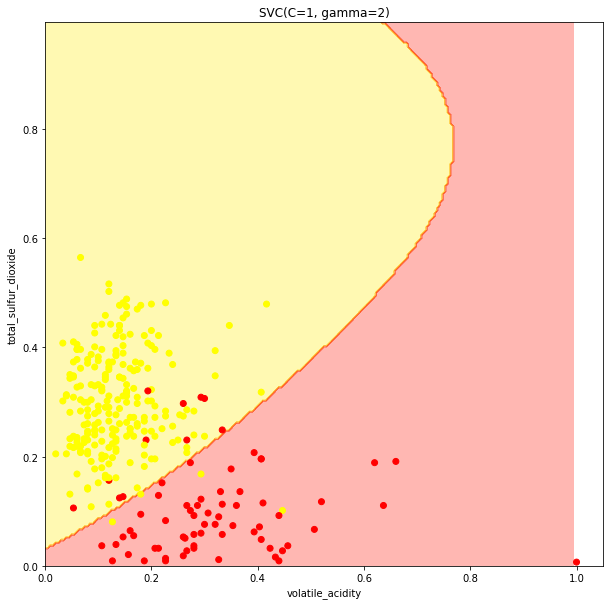

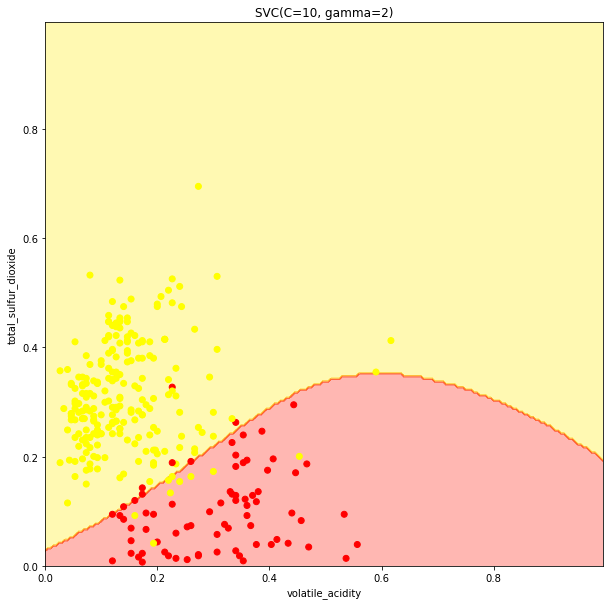

In [80]:
Cs = [.1, 1, 10]
for C in Cs:
    SVC_Gaussian = SVC(kernel='rbf', gamma=2, C=C)
    decision_boundary(SVC_Gaussian, X, y)